In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
train_dir = '/content/drive/MyDrive/FED/dataset/train'
test_dir = '/content/drive/MyDrive/FED/dataset/test'

train_datagen = ImageDataGenerator(rescale=1.0/255.0, rotation_range=20, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [ ]:

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical'
)


Found 28709 images belonging to 7 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical'
)

Found 7178 images belonging to 7 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 classes of emotions
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=30
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


449/449 ━━━━━━━━━━━━━━━━━━━━ 6504s 14s/step - accuracy: 0.2422 - loss: 1.8347 - val_accuracy: 0.3037 - val_loss: 1.7064
Epoch 2/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 240s 529ms/step - accuracy: 0.2932 - loss: 1.7392 - val_accuracy: 0.3771 - val_loss: 1.6049
Epoch 3/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 242s 534ms/step - accuracy: 0.3424 - loss: 1.6592 - val_accuracy: 0.4352 - val_loss: 1.4691
Epoch 4/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 251s 554ms/step - accuracy: 0.3879 - loss: 1.5720 - val_accuracy: 0.4855 - val_loss: 1.3693
Epoch 5/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 234s 517ms/step - accuracy: 0.4142 - loss: 1.5111 - val_accuracy: 0.4862 - val_loss: 1.3367
Epoch 6/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 252s 557ms/step - accuracy: 0.4304 - loss: 1.4727 - val_accuracy: 0.4999 - val_loss: 1.3149
Epoch 7/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 243s 537ms/step - accuracy: 0.4430 - loss: 1.4446 - val_accuracy: 0.5121 - val_loss: 1.2902
Epoch 8/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 258s 529ms/step - accuracy: 0.4433 - loss: 1.437

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


113/113 ━━━━━━━━━━━━━━━━━━━━ 31s 276ms/step - accuracy: 0.5647 - loss: 1.1194
Test Accuracy: 56.90%


In [ ]:
model.save('/content/drive/MyDrive/FED/saved_model/facial_expression_model.h5')
print("Model saved successfully!")


Model saved successfully!


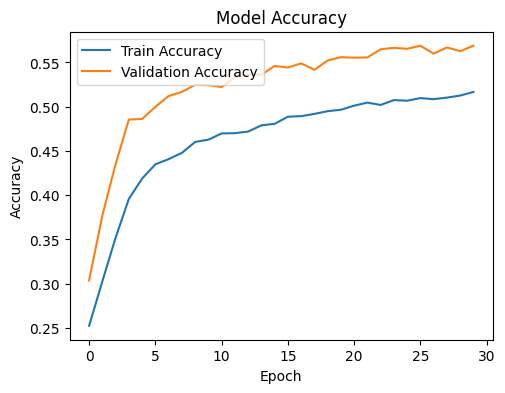

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

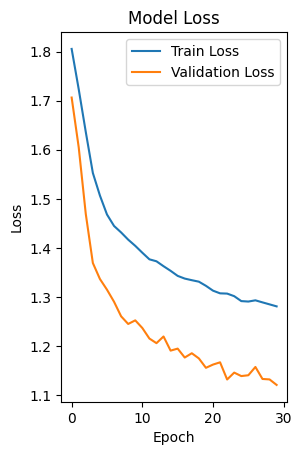

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image

def predict_emotion(img_path):
    img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')
    img_array = image.img_to_array(img) / 255.0  # Rescale pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match model input shape

    predictions = model.predict(img_array)
    emotion_index = np.argmax(predictions)
    emotions = ['disgust', 'surprise', 'neutral', 'sad', 'fear', 'angry', 'happy']
    predicted_emotion = emotions[emotion_index]

    print(f"Predicted Emotion: {predicted_emotion}")

In [1]:
predict_emotion('/content/drive/MyDrive/FED/dataset/test/angry/PrivateTest_11296953.jpg')

NameError: name 'predict_emotion' is not defined